<a href="https://colab.research.google.com/github/PrakulSmarty/EDA_Theory_03/blob/main/Module4_21BDS0003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [51]:
df = pd.read_csv("/content/Employee Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1-D Analysis

# Measures of Central Tendency

In [52]:
#Mean
mean_arithmetic = df['MonthlyIncome'].mean()  # Arithmetic mean
mean_geometric = stats.gmean(df['MonthlyIncome'])  # Geometric mean
mean_harmonic = stats.hmean(df['MonthlyIncome'])  # Harmonic mean

print("Arithmetic Mean:", mean_arithmetic)
print("Geometric Mean:", mean_geometric)
print("Harmonic Mean:", mean_harmonic)
# Median
median = df['MonthlyIncome'].median()
# Quantiles
quantiles = df['MonthlyIncome'].quantile([0.25, 0.5, 0.75])  # Quartiles
# Deciles (ntile)
deciles = df['MonthlyIncome'].quantile([i / 10 for i in range(1, 10)])
# Percentiles
percentiles = df['MonthlyIncome'].quantile([i / 100 for i in range(1, 100)])
print("Median:", median)
print("Quantiles:\n", quantiles)
print("Deciles:\n", deciles)
print("Percentiles:\n", percentiles)

Arithmetic Mean: 6502.931292517007
Geometric Mean: 5179.766220735205
Harmonic Mean: 4229.017852316271
Median: 4919.0
Quantiles:
 0.25    2911.0
0.50    4919.0
0.75    8379.0
Name: MonthlyIncome, dtype: float64
Deciles:
 0.1     2317.6
0.2     2695.8
0.3     3316.9
0.4     4228.8
0.5     4919.0
0.6     5743.4
0.7     6886.0
0.8     9860.0
0.9    13775.6
Name: MonthlyIncome, dtype: float64
Percentiles:
 0.01     1382.46
0.02     1866.22
0.03     2028.07
0.04     2070.00
0.05     2097.90
          ...   
0.95    17821.35
0.96    18620.16
0.97    19080.09
0.98    19329.86
0.99    19626.31
Name: MonthlyIncome, Length: 99, dtype: float64


# Measures of Dispersion

In [53]:
# Range
data_range = df['MonthlyIncome'].max() - df['MonthlyIncome'].min()

# Interquartile Range (IQR)
iqr = df['MonthlyIncome'].quantile(0.75) - df['MonthlyIncome'].quantile(0.25)

# Interdecile Range
interdecile_range = df['MonthlyIncome'].quantile(0.9) - df['MonthlyIncome'].quantile(0.1)

# Standard Deviation
std_dev = df['MonthlyIncome'].std()

# Skewness and Kurtosis
skewness = df['MonthlyIncome'].skew()
kurtosis = df['MonthlyIncome'].kurt()

print("Range:", data_range)
print("IQR:", iqr)
print("Interdecile Range:", interdecile_range)
print("Standard Deviation:", std_dev)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Range: 18990
IQR: 5468.0
Interdecile Range: 11458.000000000007
Standard Deviation: 4707.956783097994
Skewness: 1.3698166808390662
Kurtosis: 1.005232691449859


# Frequency Distribution

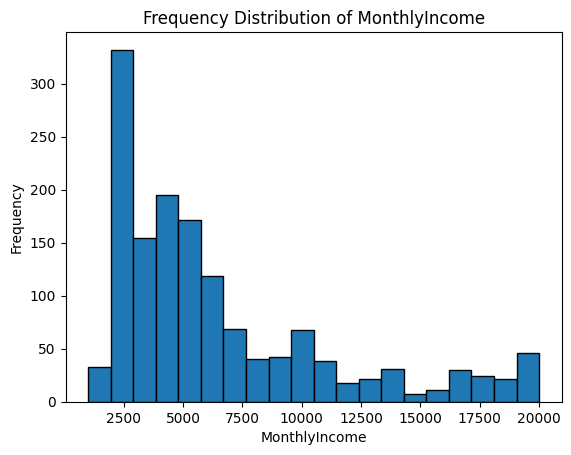

In [54]:
# Creating bins
bins = np.arange(df['MonthlyIncome'].min(), df['MonthlyIncome'].max(), step=1)
df['MonthlyIncome_score'] = pd.cut(df['MonthlyIncome'], bins=bins)

# Frequency distribution
freq_dist = df['MonthlyIncome_score'].value_counts()

# Plot Frequency Distribution (Histogram)
plt.hist(df['MonthlyIncome'], bins=20, edgecolor='black')
plt.title('Frequency Distribution of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.show()

# Relative Frequency Distribution
relative_freq = freq_dist / len(df)

# Cumulative Frequency Distribution
cumulative_freq = freq_dist.cumsum()

In [55]:
print("Frequency Distribution:\n", freq_dist)
print("Relative Frequency Distribution:\n", relative_freq)
print("Cumulative Frequency Distribution:\n", cumulative_freq)

Frequency Distribution:
 MonthlyIncome_score
(2341, 2342]      4
(5561, 5562]      3
(2740, 2741]      3
(2403, 2404]      3
(2450, 2451]      3
                 ..
(7934, 7935]      0
(7935, 7936]      0
(7936, 7937]      0
(7937, 7938]      0
(19997, 19998]    0
Name: count, Length: 18989, dtype: int64
Relative Frequency Distribution:
 MonthlyIncome_score
(2341, 2342]      0.002721
(5561, 5562]      0.002041
(2740, 2741]      0.002041
(2403, 2404]      0.002041
(2450, 2451]      0.002041
                    ...   
(7934, 7935]      0.000000
(7935, 7936]      0.000000
(7936, 7937]      0.000000
(7937, 7938]      0.000000
(19997, 19998]    0.000000
Name: count, Length: 18989, dtype: float64
Cumulative Frequency Distribution:
 MonthlyIncome_score
(2341, 2342]         4
(5561, 5562]         7
(2740, 2741]        10
(2403, 2404]        13
(2450, 2451]        16
                  ... 
(7934, 7935]      1468
(7935, 7936]      1468
(7936, 7937]      1468
(7937, 7938]      1468
(19997, 19998]

# Pie Chart

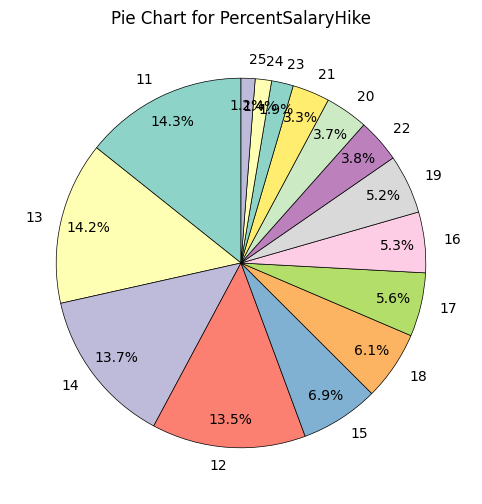

In [56]:
def make_autopct(pct):
    return f'{pct:.1f}%' if pct > 0 else ''
plt.figure(figsize=(8, 6))
df['PercentSalaryHike'].value_counts().plot.pie(
    autopct=make_autopct,
    colors=sns.color_palette('Set3'),
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'}
)

plt.title('Pie Chart for PercentSalaryHike')
plt.ylabel('')
plt.show()

# Stacked Bar Plot

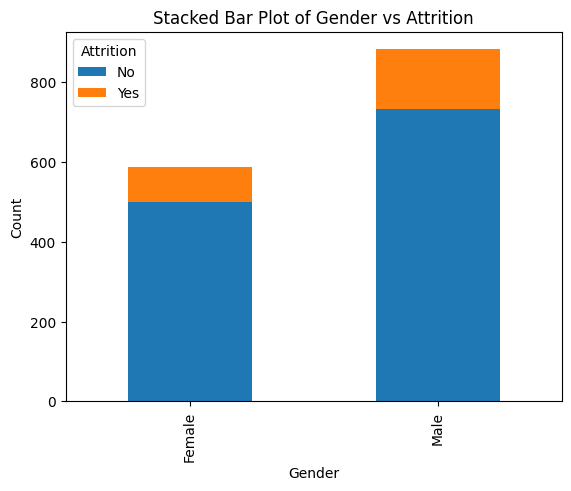

In [57]:
df.groupby(['Gender', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender vs Attrition')
plt.ylabel('Count')
plt.show()

# Box Plot

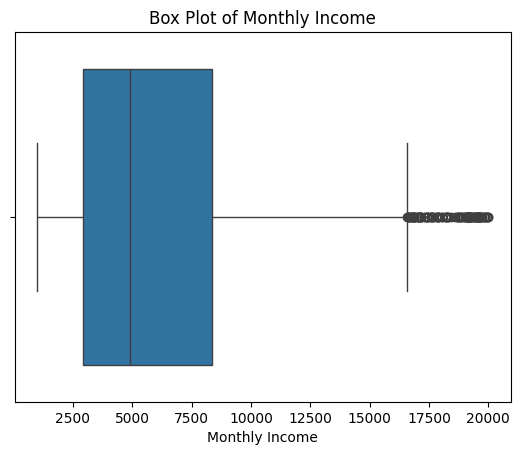

In [58]:
sns.boxplot(x=df['MonthlyIncome'])
plt.title('Box Plot of Monthly Income')
plt.xlabel('Monthly Income')
plt.show()

# Violin Plot

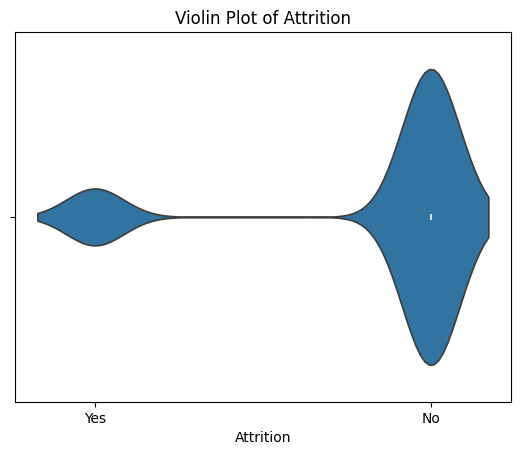

In [59]:
sns.violinplot(x=df['Attrition'])
plt.title('Violin Plot of Attrition')
plt.xlabel('Attrition')
plt.show()

# Density Plot

<ipython-input-60-e67bf9a72040>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['EnvironmentSatisfaction'], shade=True)


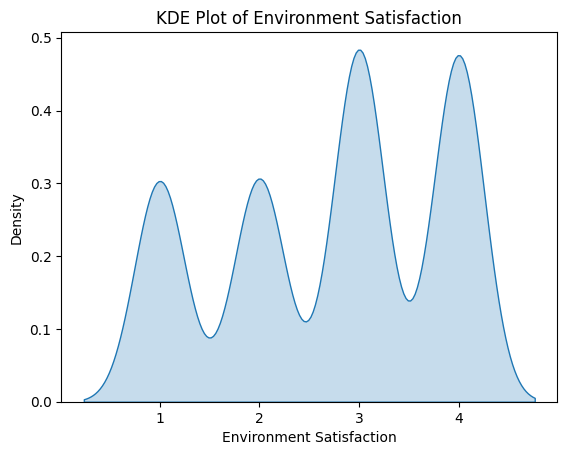

In [60]:
sns.kdeplot(df['EnvironmentSatisfaction'], shade=True)
plt.title('KDE Plot of Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Density')
plt.show()

# Area Plot

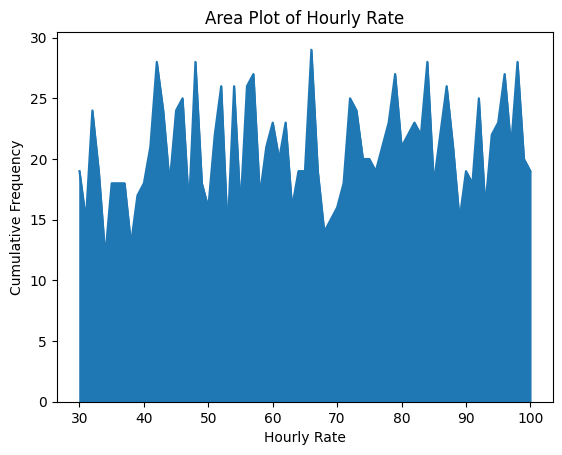

In [61]:
df['HourlyRate'].value_counts().sort_index().plot.area()
plt.title('Area Plot of Hourly Rate')
plt.xlabel('Hourly Rate')
plt.ylabel('Cumulative Frequency')
plt.show()

# 2-D Analysis

# Scatter Plot

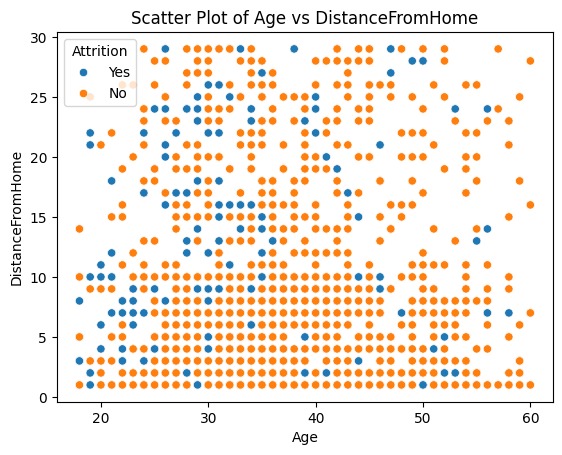

In [62]:
sns.scatterplot(x='Age', y='DistanceFromHome', data=df, hue='Attrition')
plt.title('Scatter Plot of Age vs DistanceFromHome')
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')
plt.show()

# Contour Plot

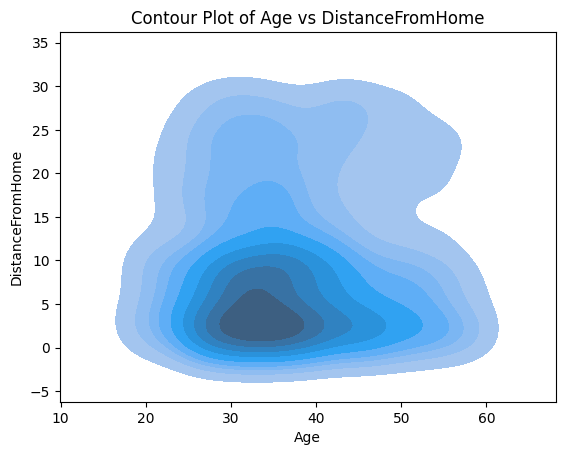

In [63]:
sns.kdeplot(x='Age', y='DistanceFromHome', data=df, fill=True)
plt.title('Contour Plot of Age vs DistanceFromHome')
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')
plt.show()

# Dot Chart

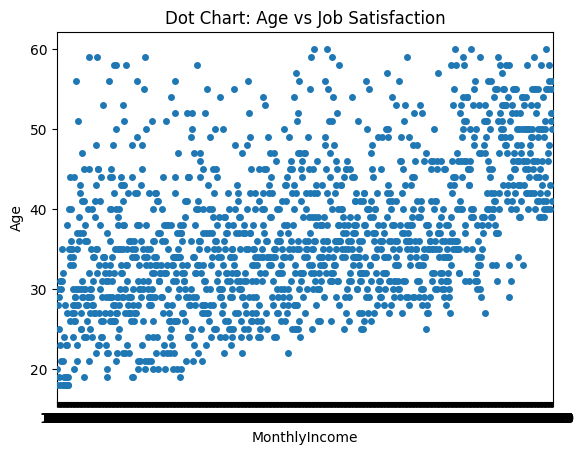

In [64]:
sns.stripplot(x='MonthlyIncome', y='Age', data=df, jitter=True)
plt.title('Dot Chart: Age vs Job Satisfaction')
plt.show()

# Bubble Chart

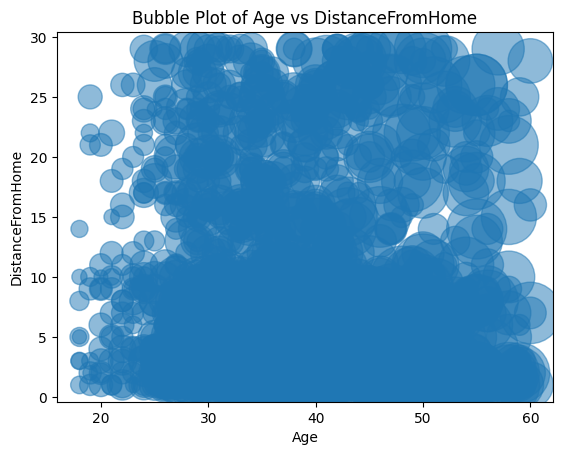

In [65]:
plt.scatter(df['Age'], df['DistanceFromHome'], s=df['MonthlyIncome'] / 10, alpha=0.5)
plt.title('Bubble Plot of Age vs DistanceFromHome')
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')
plt.show()

# Bar Chart

<ipython-input-66-3aafa59ed6df>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobRole', y='MonthlyIncome', data=df, estimator=np.mean, ci=None)


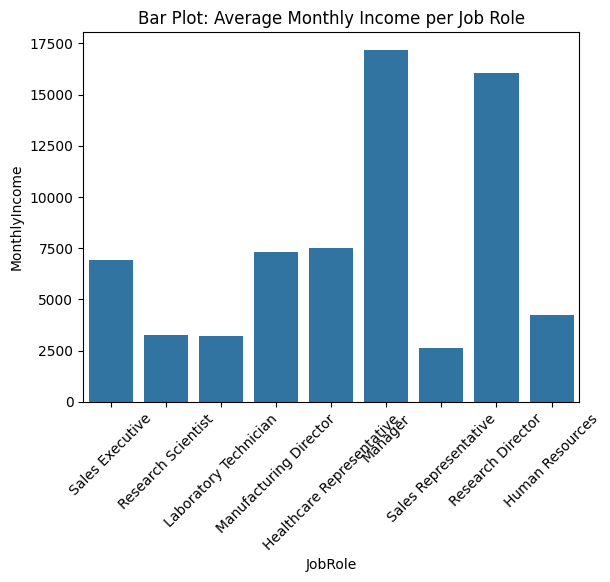

In [66]:
sns.barplot(x='JobRole', y='MonthlyIncome', data=df, estimator=np.mean, ci=None)
plt.xticks(rotation=45)
plt.title('Bar Plot: Average Monthly Income per Job Role')
plt.show()

# 3-D Analysis